In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


## Loading YoloV3


In [2]:

net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]


print("These are our classes :\n",classes)

These are our classes :
 ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [3]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

### Loading image


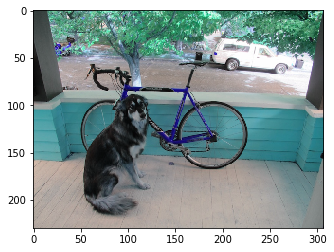

In [4]:
img = cv2.imread("dog.jpg")
img = cv2.resize(img, None, fx=0.4, fy=0.4)
height, width, channels = img.shape
plt.imshow(img)


## Detecting objects


In [5]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)
outs

[array([[0.03900202, 0.04439746, 0.3889583 , ..., 0.        , 0.        ,
         0.        ],
        [0.04648951, 0.03663757, 0.27167624, ..., 0.        , 0.        ,
         0.        ],
        [0.04434745, 0.03739526, 0.79143417, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.95658547, 0.9506671 , 0.4400897 , ..., 0.        , 0.        ,
         0.        ],
        [0.96360373, 0.9624392 , 0.31277657, ..., 0.        , 0.        ,
         0.        ],
        [0.9648003 , 0.96377075, 0.7825974 , ..., 0.        , 0.        ,
         0.        ]], dtype=float32),
 array([[0.02041733, 0.02394098, 0.04614183, ..., 0.        , 0.        ,
         0.        ],
        [0.01793046, 0.01854582, 0.3957134 , ..., 0.        , 0.        ,
         0.        ],
        [0.02090964, 0.01807363, 0.07632899, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.97276026, 0.9757933 , 0.05201354, ..., 0.        , 0.        ,
         0.        

## Showing informations on the screen


image after object detection process


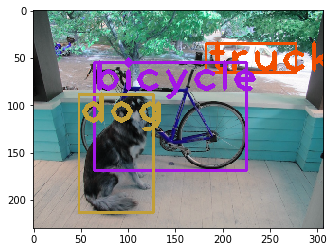

In [6]:
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font,3 , color, 3)

print("image after object detection process")
plt.imshow(img)